In [1]:
import tensorflow as tf
from keras.models import Sequential
import numpy as np
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Embedding, SimpleRNN
import string
import datetime
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize

2025-11-21 17:10:26.192805: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-21 17:10:26.194088: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-21 17:10:26.202509: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-21 17:10:26.265586: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-21 17:10:26.915885: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
dataset = open("sms.txt")

In [3]:
nltk.download('punkt')
nltk.download('punkt_tab')
X=[]
Y=[]
vocabulario={}
translator = str.maketrans(dict.fromkeys(string.punctuation))
for linea in dataset:
    label,text=linea.strip().split("\t")
    text=text.translate(translator)
    message=[]
    for i in sent_tokenize(text):
        for j in word_tokenize(i):
            palabra=j.lower()
            message.append(palabra)
            if palabra in vocabulario:
                vocabulario[palabra]+=1
            else:
                vocabulario[palabra]=1
    X.append(message)
    y=[1] if label=="spam" else [0]
    Y.append(y)
print(len(vocabulario.keys()))

[nltk_data] Downloading package punkt to /home/johndoe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/johndoe/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


9636


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [14]:
X[0]

['ok', 'lar', 'joking', 'wif', 'u', 'oni']

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [6]:
sequences[0]

[46,
 442,
 4385,
 798,
 716,
 680,
 64,
 9,
 1250,
 89,
 120,
 356,
 1251,
 154,
 2898,
 1252,
 67,
 55,
 4386,
 137]

In [7]:
words=list(tokenizer.word_index.keys())
print(words)
vocabulary=len(words)+1
print(len(vocabulario.keys()))

['to', 'i', 'you', 'a', 'the', 'u', 'and', 'is', 'in', 'me', 'my', 'for', 'your', 'it', 'of', 'call', 'have', 'on', 'that', 'are', '2', 'now', 'im', 'not', 'so', 'but', 'or', 'can', 'at', 'do', 'ur', 'get', 'be', 'will', 'if', 'with', 'just', 'we', 'no', 'this', 'its', 'up', '4', 'dont', 'when', 'go', 'ok', 'from', 'free', 'all', 'out', 'how', 'what', 'know', 'got', 'like', 'ill', 'good', 'then', 'was', 'come', 'am', 'time', 'only', 'day', 'love', 'there', 'want', 'send', 'text', 'he', 'as', 'by', 'going', 'one', 'ü', 'need', 'about', 'txt', 'home', 'lor', 'see', 'sorry', 'still', 'r', 'back', 'stop', 'our', 'n', 'reply', 'today', 'mobile', 'tell', 'new', 'well', 'later', 'hi', 'think', 'been', 'da', 'she', 'any', 'please', 'take', 'they', 'her', 'phone', 'cant', 'did', 'some', 'here', 'has', 'week', 'night', 'an', 'claim', 'oh', 'who', 'much', 'great', 'hey', 'dear', 'him', 'more', 'pls', 'happy', 'na', 'd', 'too', 'hope', 'had', 'give', 'make', 'way', 'where', 'work', 'wat', 'should'

In [8]:
X = pad_sequences(sequences)

In [9]:
X.shape

(5574, 171)

In [10]:
input_length=len(X[0])
print(vocabulary,input_length)
X=np.asarray(X)
Y=np.asarray(Y)


9637 171


In [11]:
x_train,x_val,y_train,y_val=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)

In [12]:
modelo=Sequential()
modelo.add(Embedding(input_dim=vocabulary,output_dim=64))
modelo.add(SimpleRNN(64))
modelo.add(Dense(1,activation="sigmoid"))
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
modelo.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["acc"])

In [14]:
tag="rnn"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
spam=modelo.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=4,verbose=2,
callbacks=[tensorboard_callback])

Epoch 1/4
140/140 - 4s - 31ms/step - acc: 0.9224 - loss: 0.2393 - val_acc: 0.9830 - val_loss: 0.0708
Epoch 2/4
140/140 - 3s - 22ms/step - acc: 0.9886 - loss: 0.0447 - val_acc: 0.9857 - val_loss: 0.0557
Epoch 3/4
140/140 - 3s - 21ms/step - acc: 0.9962 - loss: 0.0181 - val_acc: 0.9812 - val_loss: 0.0743
Epoch 4/4
140/140 - 3s - 21ms/step - acc: 0.9978 - loss: 0.0099 - val_acc: 0.9848 - val_loss: 0.0641


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
y_pred_probs=modelo.predict(x_val)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


Text(33.22222222222222, 0.5, 'Real')

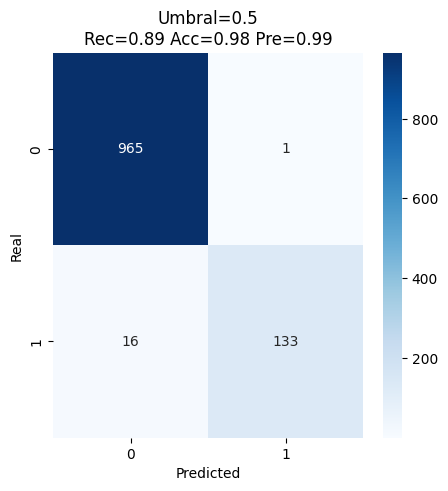

In [19]:
umbral=0.5
y_pred=y_pred_probs[:]>=umbral
fig, axes = plt.subplots(1,1)
fig.set_size_inches(5, 5)
matriz = confusion_matrix(y_val, y_pred)
ax=axes
sns.heatmap(matriz, annot=True, ax = ax, cmap="Blues",fmt="d");
ax.set_title("Umbral="+str(umbral)+"\nRec="+str(round(recall_score(y_val, y_pred),2))+
" Acc="+str(round(accuracy_score(y_val, y_pred),2))+
" Pre="+str(round(precision_score(y_val, y_pred),2)))
axes.set_xlabel('Predicted')
axes.set_ylabel('Real')